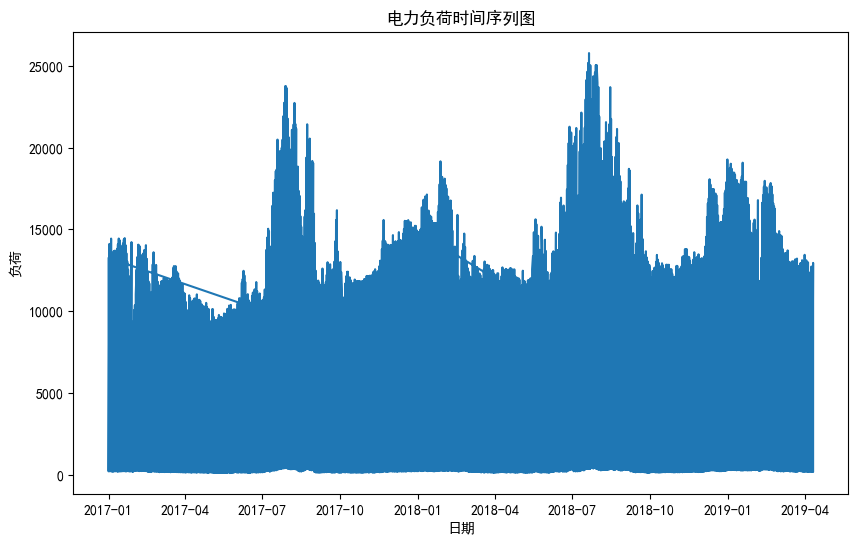

D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A d

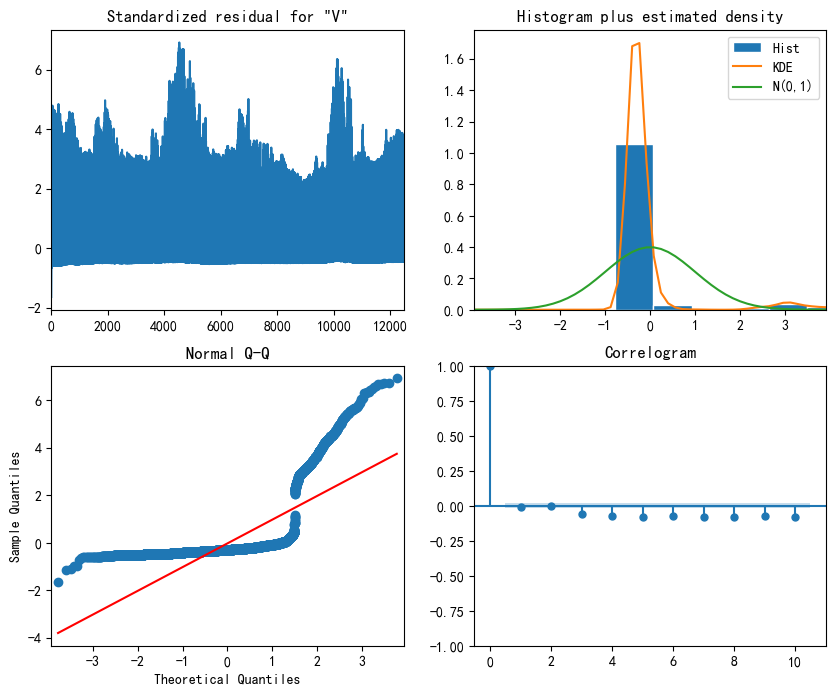

12465    1791.720238
12466    1997.978609
12467    1881.895415
12468    1851.390451
12469    1858.554221
Name: predicted_mean, dtype: float64
预测误差: 12465   -1708.279762
12466   -1602.021391
12467   -1818.104585
12468   -1948.609549
12469   -2041.445779
Name: predicted_mean, dtype: float64
均方误差(MSE): 3350955.3222926743


D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
D:\anaconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [7]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# 假设df是包含电力负荷数据的DataFrame，其中'负荷'是目标列
df = pd.read_excel('./某省电力负荷(20170101-20190411).xlsx')  # 加载数据
df['日期'] = pd.to_datetime(df['日期'])  # 转换日期格式
df.set_index('日期', inplace=True)  # 将日期设置为索引

# 数据探索
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['V00'])  # 假设V00是负荷数据列
plt.title('电力负荷时间序列图')
plt.xlabel('日期')
plt.ylabel('负荷')
plt.show()

# ARIMA模型拟合
# 假设通过模型识别得到参数p=2, d=1, q=1

model = ARIMA(df['V00'], order=(2, 1, 1))
model_fit = model.fit()

# 模型诊断
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

# 预测未来值
forecast = model_fit.forecast(steps=5)  # 预测未来5个时间点的负荷
print(forecast)

# 性能评估
# 假设有未来5个时间点的实际负荷值
actual_values = [3500, 3600, 3700, 3800, 3900]  # 这只是一个示例
error = forecast - actual_values
print('预测误差:', error)
print('均方误差(MSE):', (error ** 2).mean())

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号'-'显示为方块的问题